# Learning Curve Analysis
Visualize how model performance changes with training set size.
Assumes results from `run_learning_curve_sizes.py` (CSV with train_size, val/test metrics).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

results_path = "../data/learning_curve_sizes.csv"
df = pd.read_csv(results_path)
df = df.sort_values("train_size")

print(df.head())
print(f"Rows: {len(df)}; Train sizes: {df['train_size'].tolist()}")

   train_size                               subset_path  threshold  \
0         500   data/train_subsets/train_subset_500.csv       0.50   
1        1000  data/train_subsets/train_subset_1000.csv       0.40   
2        2000  data/train_subsets/train_subset_2000.csv       0.50   
3        3740  data/train_subsets/train_subset_3740.csv       0.55   

   val_precision  val_recall    val_f1  val_bal_acc  test_precision  \
0       0.819672    0.833333  0.826446     0.824616        0.722222   
1       0.796154    0.862500  0.828000     0.820371        0.709091   
2       0.822581    0.850000  0.836066     0.832950        0.726562   
3       0.829167    0.829167  0.829167     0.828809        0.756000   

   test_recall   test_f1  test_bal_acc  
0     0.758333  0.739837      0.732723  
1     0.812500  0.757282      0.738886  
2     0.775000  0.750000      0.741056  
3     0.787500  0.771429      0.766135  
Rows: 4; Train sizes: [500, 1000, 2000, 3740]


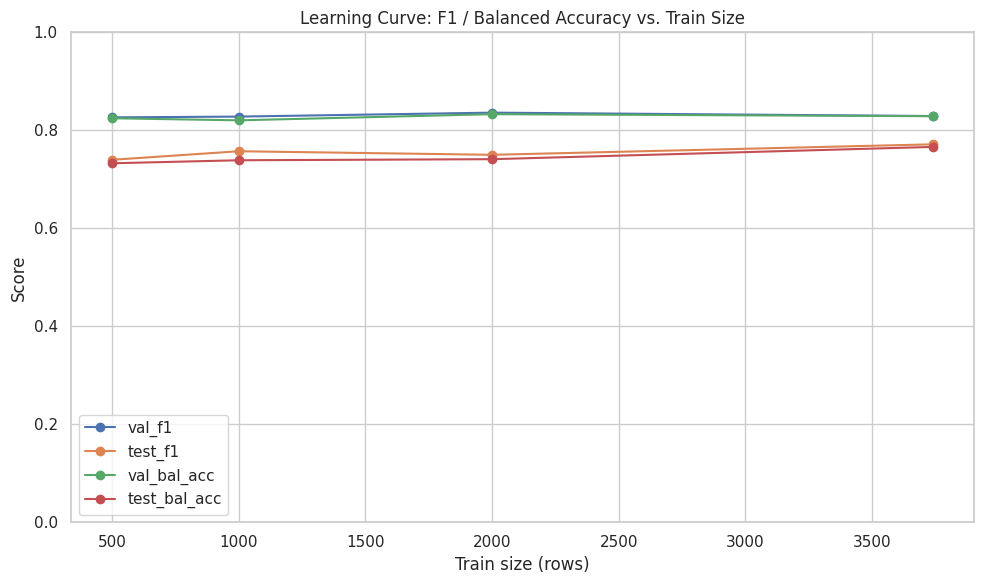

In [3]:
metrics = ["val_f1", "test_f1", "val_bal_acc", "test_bal_acc"]

plt.figure(figsize=(10, 6))
for m in metrics:
    plt.plot(df["train_size"], df[m], marker="o", label=m)
plt.xlabel("Train size (rows)")
plt.ylabel("Score")
plt.title("Learning Curve: F1 / Balanced Accuracy vs. Train Size")
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

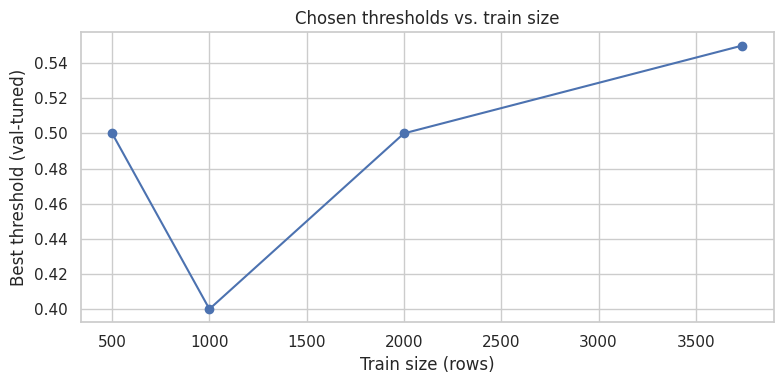

,train_size,subset_path,threshold,val_precision,val_recall,val_f1,val_bal_acc,test_precision,test_recall,test_f1,test_bal_acc
0,500,data/train_subsets/train_subset_500.csv,0.50,0.819672,0.833333,0.826446,0.824616,0.722222,0.758333,0.739837,0.732723
1,1000,data/train_subsets/train_subset_1000.csv,0.40,0.796154,0.862500,0.828000,0.820371,0.709091,0.812500,0.757282,0.738886
2,2000,data/train_subsets/train_subset_2000.csv,0.50,0.822581,0.850000,0.836066,0.832950,0.726562,0.775000,0.750000,0.741056
3,3740,data/train_subsets/train_subset_3740.csv,0.55,0.829167,0.829167,0.829167,0.828809,0.756000,0.787500,0.771429,0.766135


In [4]:
# If thresholds vary, inspect them
if "threshold" in df.columns:
    plt.figure(figsize=(8, 4))
    plt.plot(df["train_size"], df["threshold"], marker="o")
    plt.xlabel("Train size (rows)")
    plt.ylabel("Best threshold (val-tuned)")
    plt.title("Chosen thresholds vs. train size")
    plt.tight_layout()
    plt.show()

df